C:\Users\visha\AppData\Local\Temp\ipykernel_6952\4275625764.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=data, palette="Set2")


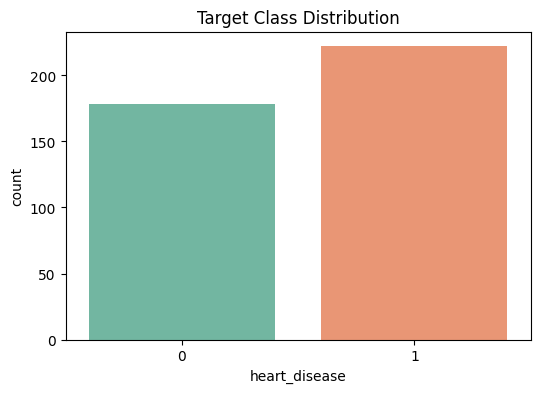

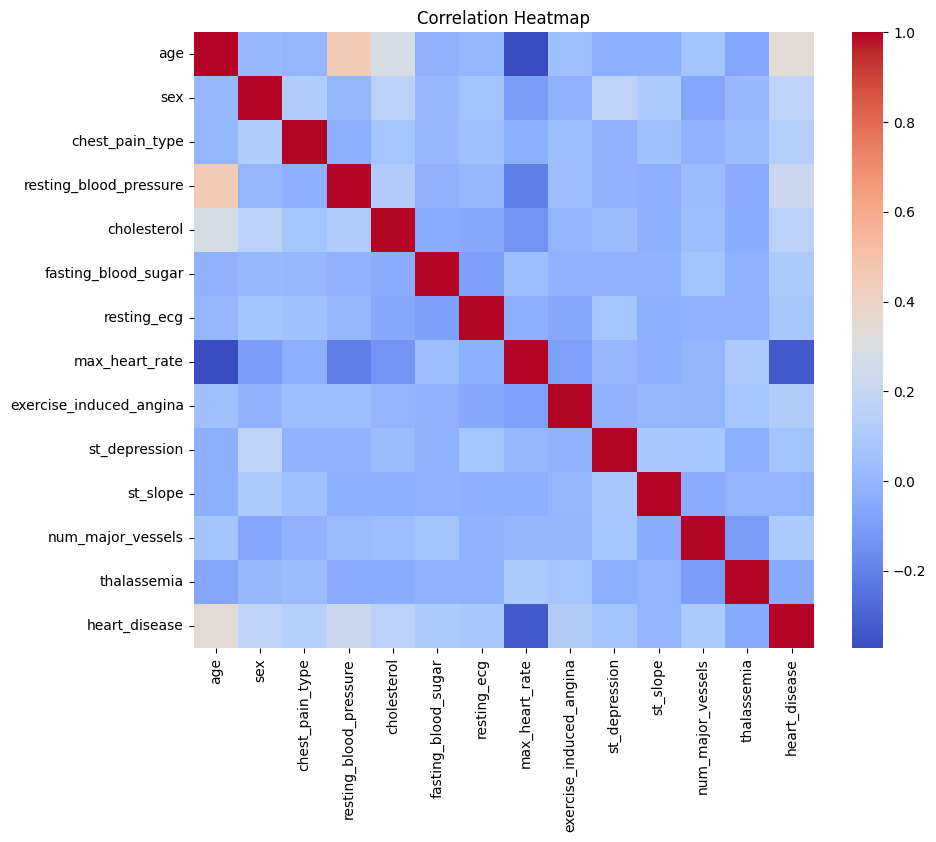

C:\Users\visha\AppData\Local\Temp\ipykernel_6952\4275625764.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y="age", data=data, palette="Set3")


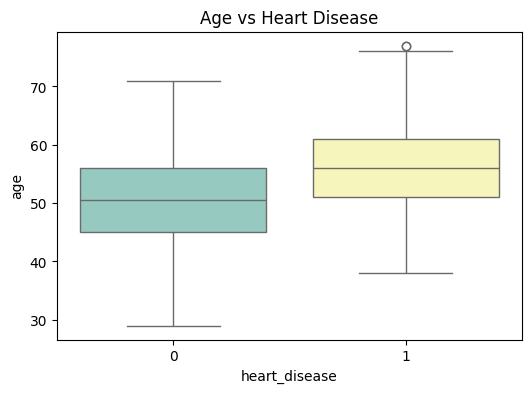

X (features):
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_major_vessels  thalassemia  
0            0.4         1   

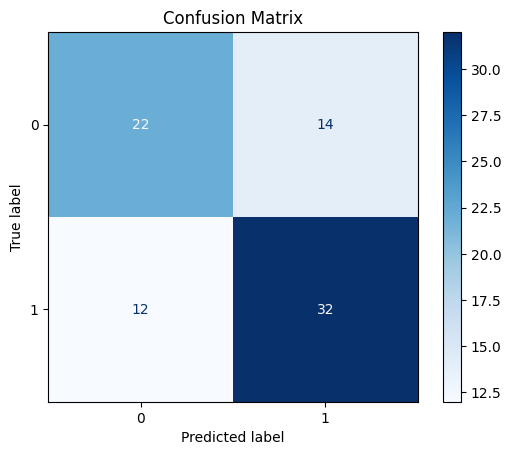

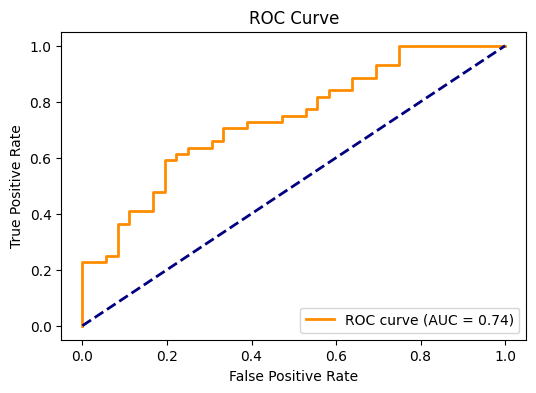

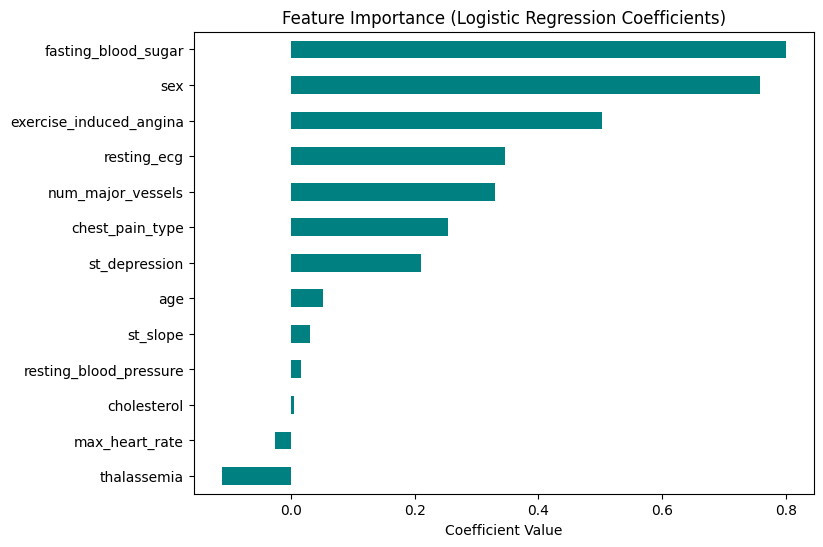

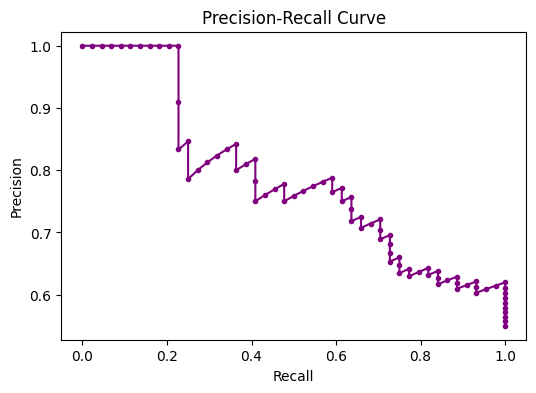

In [3]:
# ==========================
# Logistic Regression on Heart Disease Dataset
# ==========================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay,
    precision_recall_curve
)

# 2. Load Dataset
file_path = ('heart_disease_dataset.csv')   # change path if needed
data = pd.read_csv(file_path)

# Target column
target_col = "heart_disease"

# 3. EDA (basic visualization)
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=data, palette="Set2")
plt.title("Target Class Distribution")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y="age", data=data, palette="Set3")
plt.title("Age vs Heart Disease")
plt.show()

# 4. Preprocessing
X = data.drop(columns=[target_col])   # all features
y = data[target_col]                  # only target

# Check split
print("X (features):")
print(X.head())
print("\nY (target):")
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Model Building
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 6. Prediction & Evaluation
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

print("\nAccuracy on Test Set:", log_reg.score(X_test, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance (Coefficients)
coefficients = pd.Series(log_reg.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(8,6))
coefficients.plot(kind="barh", color="teal")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

# Precision-Recall Curve (Optional)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()